# **Modul 5 - Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PNSR, Averafe Denoising, Image Masking**

## **Laporan Praktikum Mata Kuliah Pengolahan Citra dan Visi Komputer oleh:**

### Hanifah Amany

### TI-3E/16

[Link GitHub](https://github.com/hanifahamany/PCVK_Ganjil_2024/tree/main/Week_5_Hanifah)

## **Tugas Praktikum**

1.   Buat Gamma Corection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


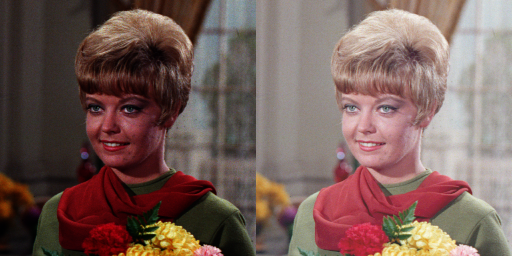

In [ ]:
import cv2 as cv
import numpy as np

from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt

print('Gamma Correction pada citra')
print('----------------------------------')
try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK 2024/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)
#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2.   Buat Simulasi Image Depth

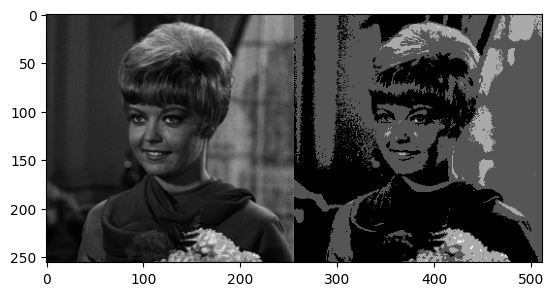

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK 2024/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

# Akses Per Piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')

3.   Buat Modul Average Denising

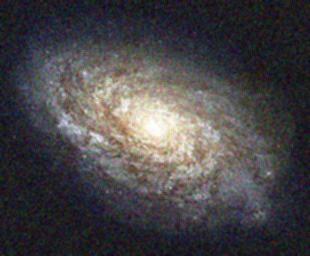

PSNR image 5 : 19.160611911075883 dB


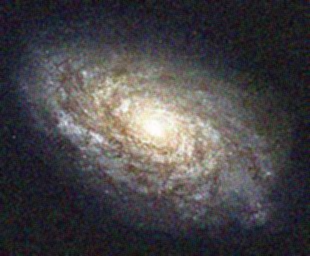

PSNR image 10 : 19.156791723864103 dB


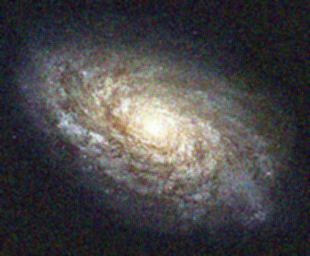

PSNR image 20 : 19.146668136503397 dB


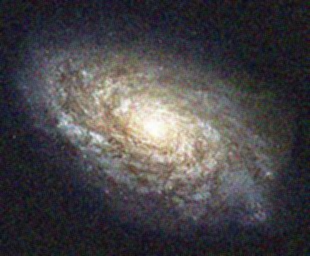

PSNR image 40 : 19.164875113268845 dB


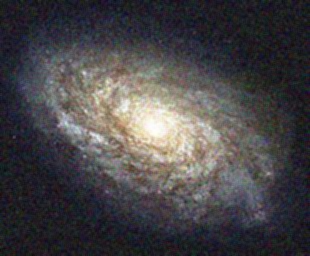

PSNR image 80 : 19.13219841479674 dB
Index 100 is out of range.
Average PSNR: 19.152229059901792 dB


In [ ]:
import cv2
import numpy as np
import glob

def average_denoising(images):
    denoised_images = []
    for image in images:
        denoised_image = cv2.blur(image, (3, 3))  # Using averaging filter with a kernel size of 3x3
        denoised_images.append(denoised_image)
    return denoised_images

# Read the original image
img_asli = cv2.imread('/content/drive/MyDrive/PCVK 2024/galaxy.jpg')

# Read images with Gaussian Noise
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK 2024/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

# Perform average denoising on the images
denoised_images = average_denoising(cv_img)

# Calculate and print PSNR for specific denoised images
indices = [5, 10, 20, 40, 80, 100]
psnr_values = []
for i in indices:
    if i >= len(denoised_images):
        print('Index', i, 'is out of range.')
        continue

    # Resize the original image to match the denoised image's dimensions
    resized_img_asli = cv2.resize(img_asli, (denoised_images[i].shape[1], denoised_images[i].shape[0]))

    resized_img_asli_float = resized_img_asli.astype(np.float32)
    denoised_image_float = denoised_images[i].astype(np.float32)
    psnr = cv2.PSNR(resized_img_asli_float, denoised_image_float) # Use the resized image for PSNR calculation
    psnr_values.append(psnr)
    cv2_imshow(denoised_images[i]) # Display the denoised image
    print('PSNR image', i, ':', psnr, 'dB')

# Print the conclusion
average_psnr = np.mean(psnr_values)
print('Average PSNR:', average_psnr, 'dB')

Jadi, dapat disimpulkan bahwa semakin tinggi nilai PSNR, semakin baik kualitas restorasi gambar tersebut.

4.   Buat image masking.

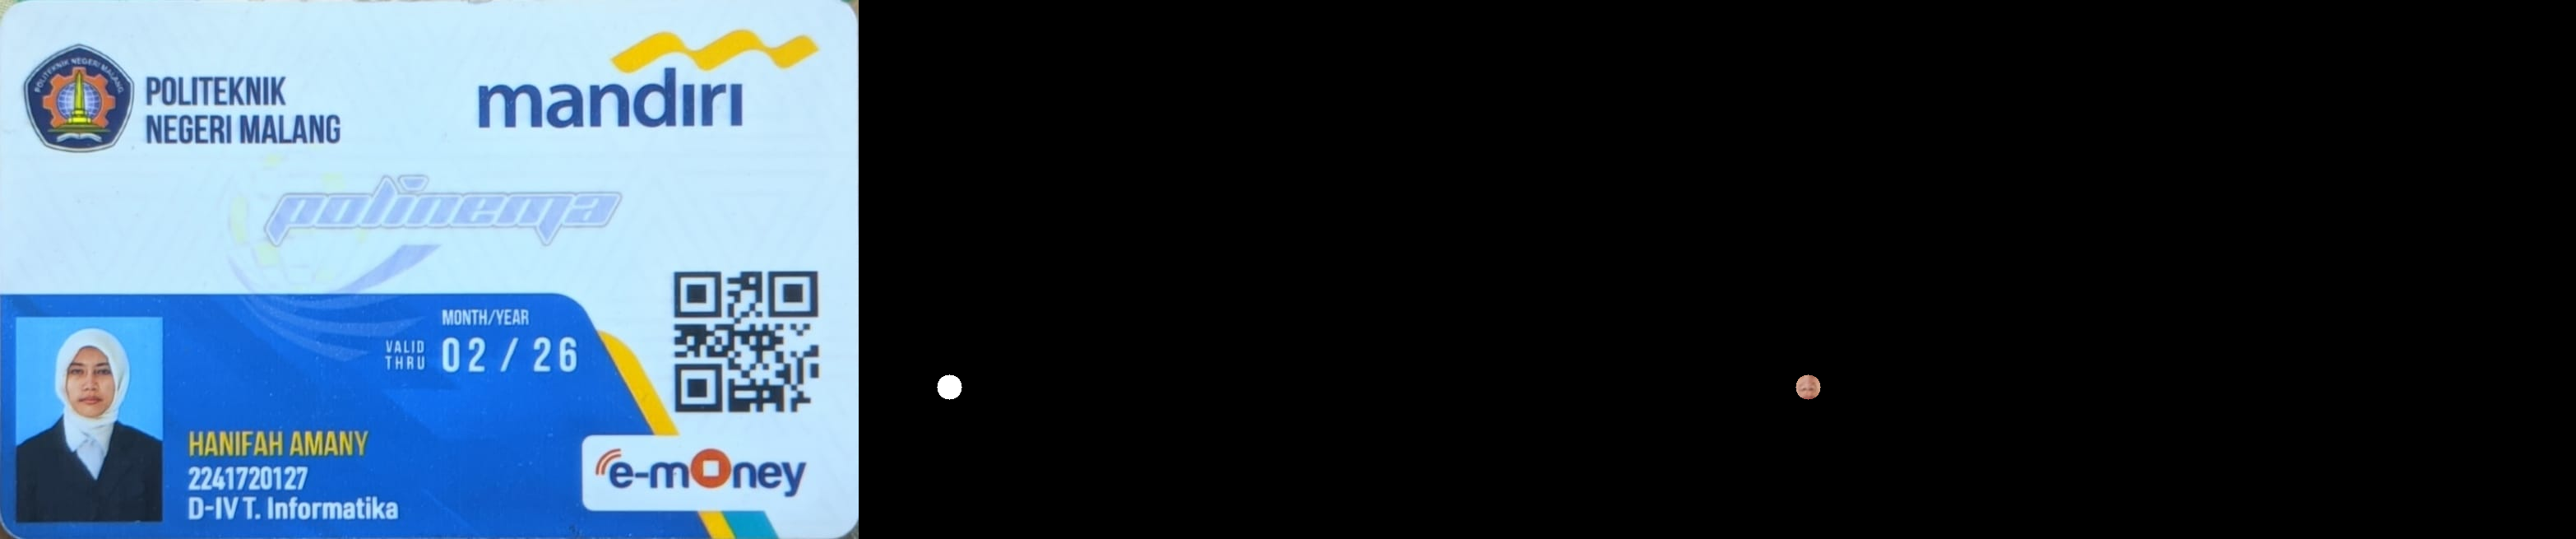

In [ ]:
# Kelompok 3, masking bagian hidung
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow # for image display

path='/content/drive/MyDrive/PCVK 2024/KTM Hanifah.jpg'
KTM=cv.imread(path)
mask = np.zeros_like(KTM)

center1 = (110, 470)
radius1 = 15

cv.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv.bitwise_and(KTM, mask)

final_frame = cv.hconcat((KTM,mask,masked_image))
cv2_imshow(final_frame)

5.   Percobaan menggunakan operator lain.

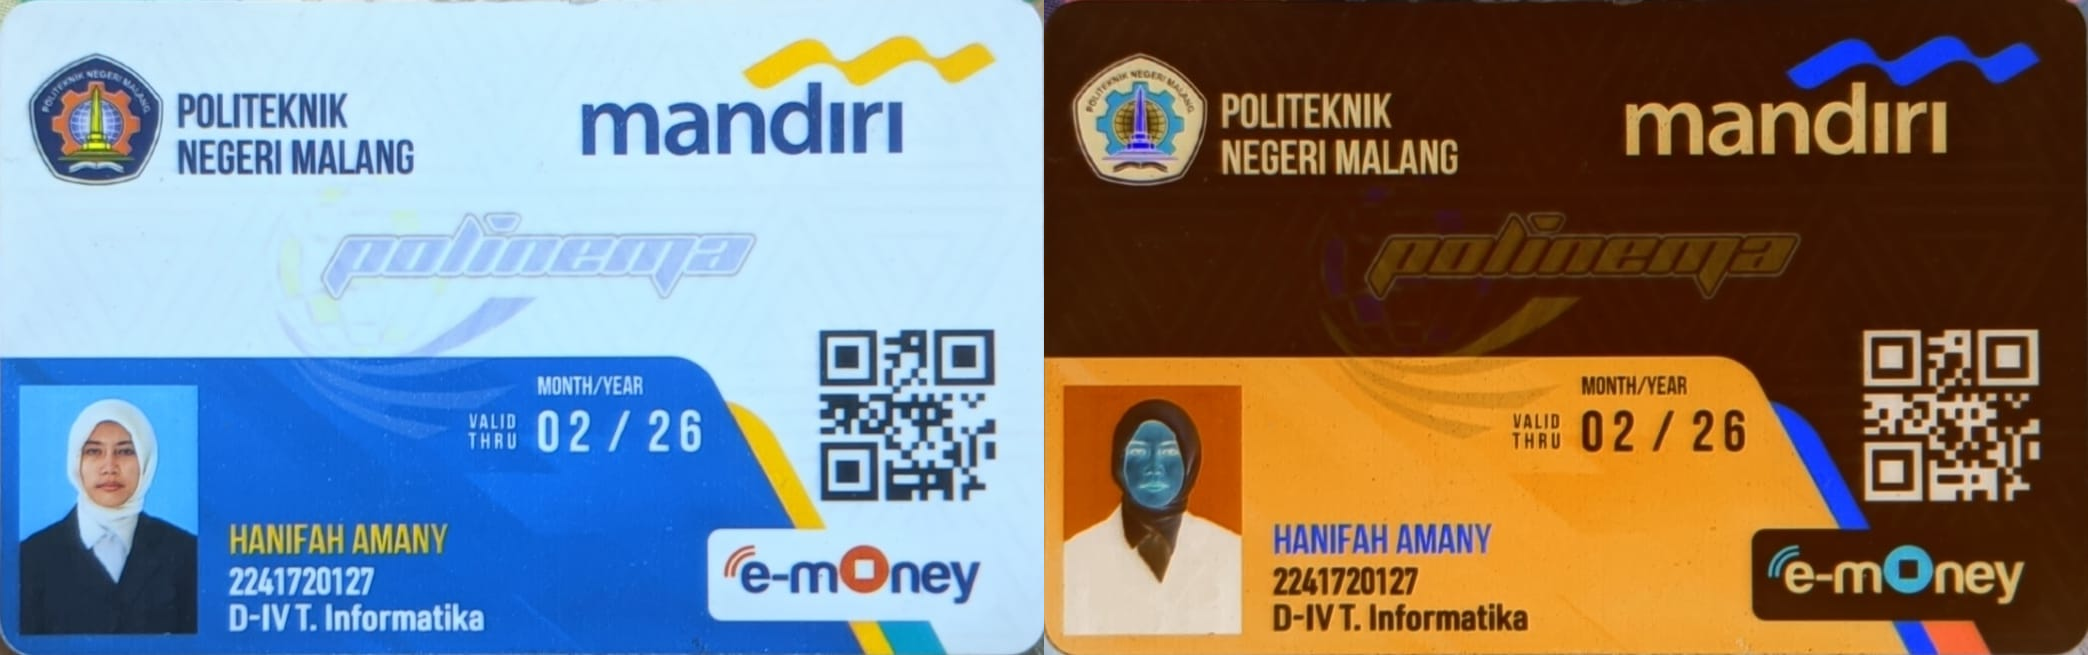

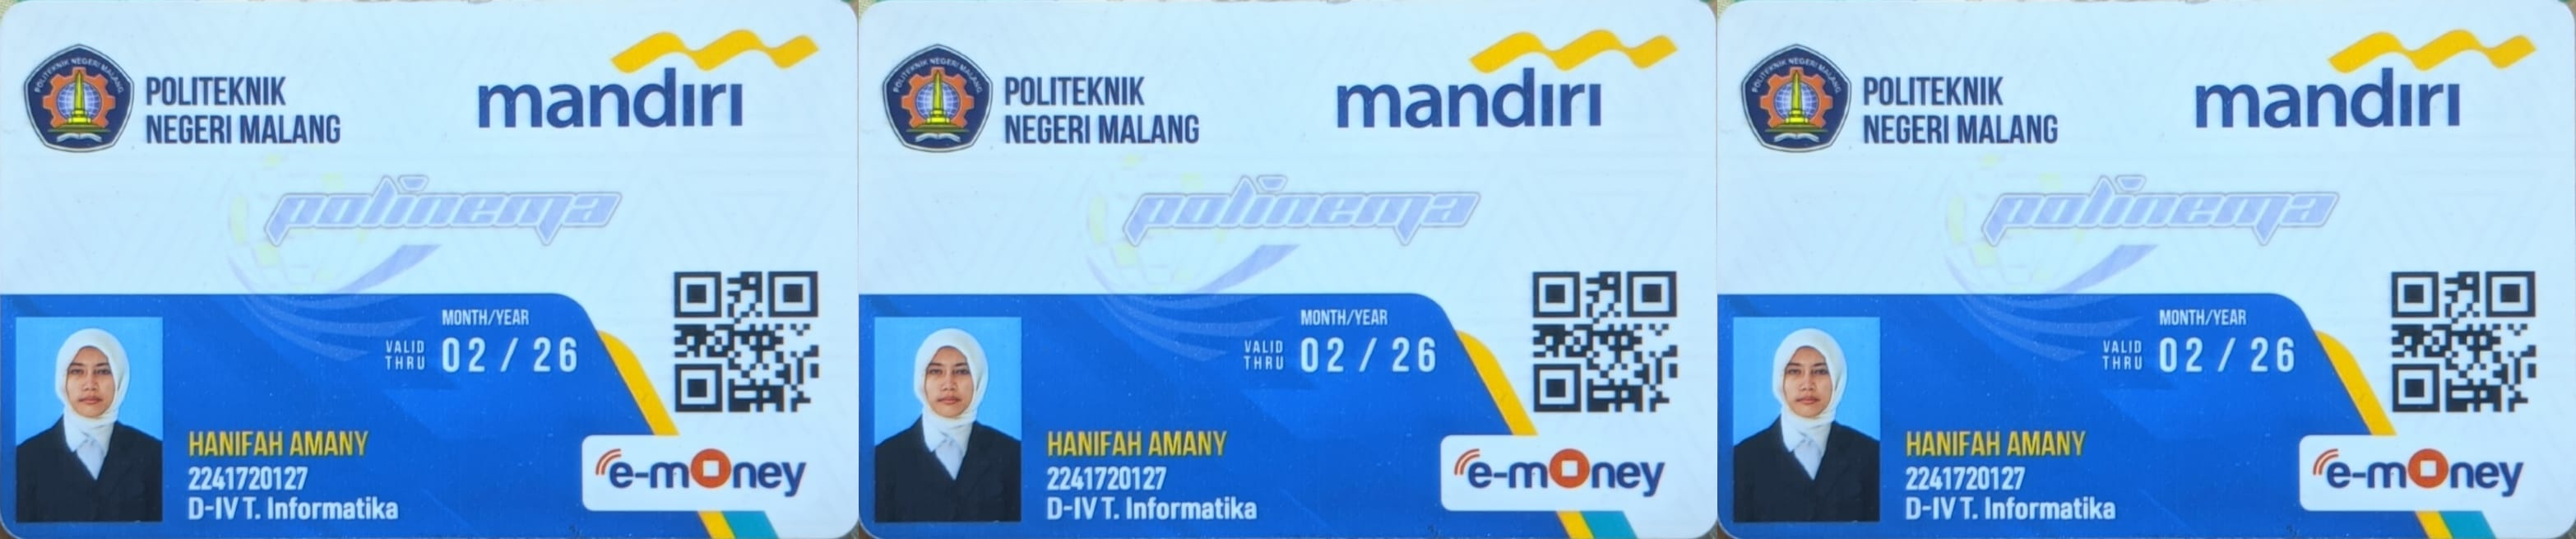

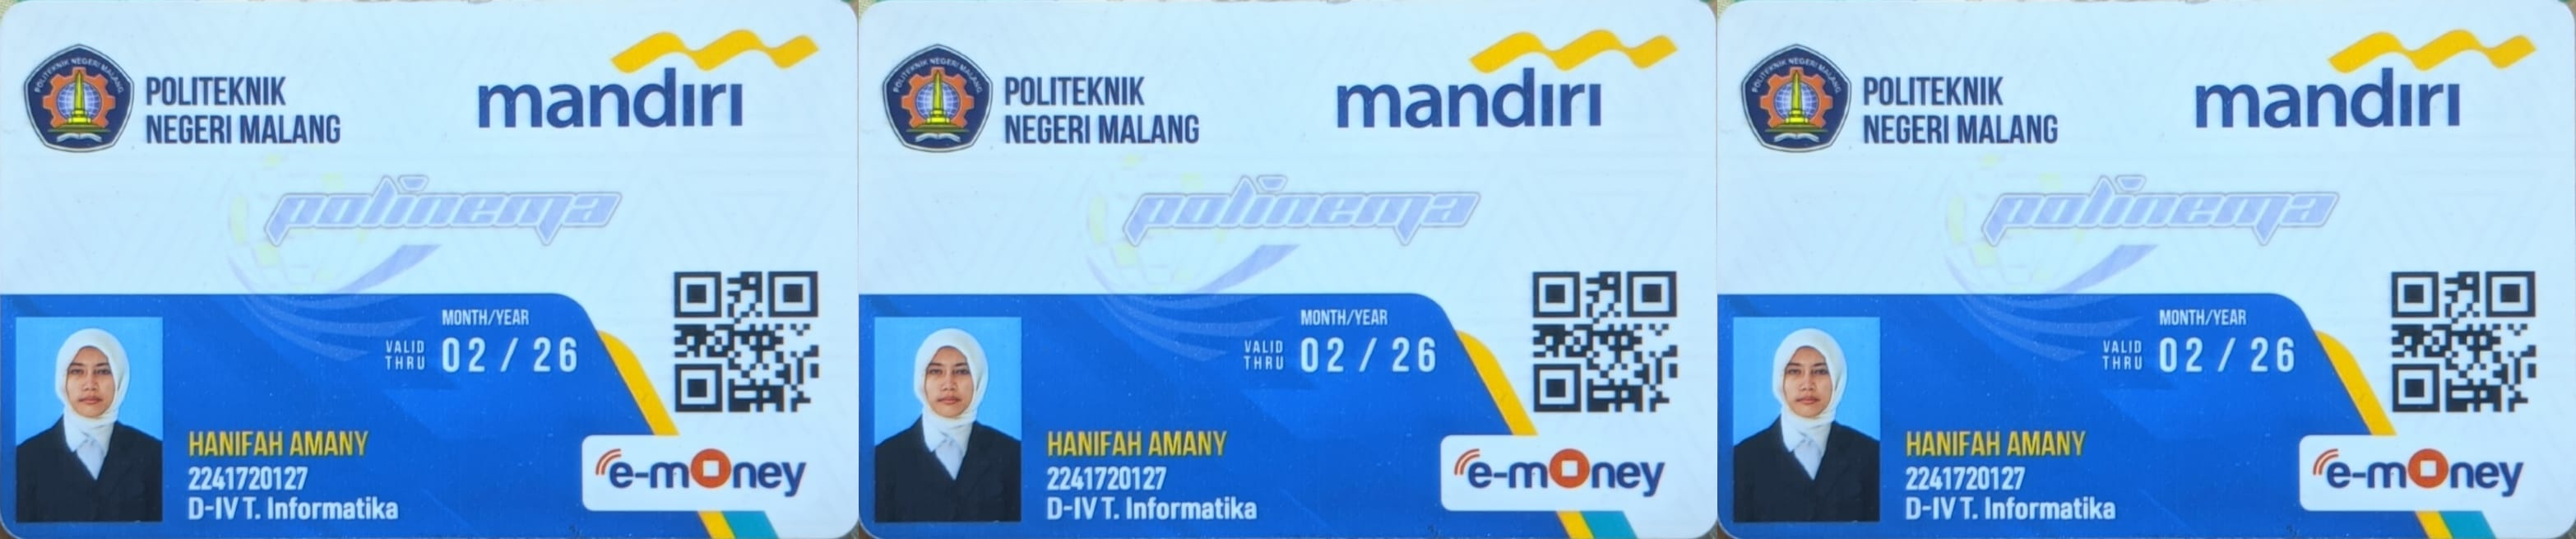

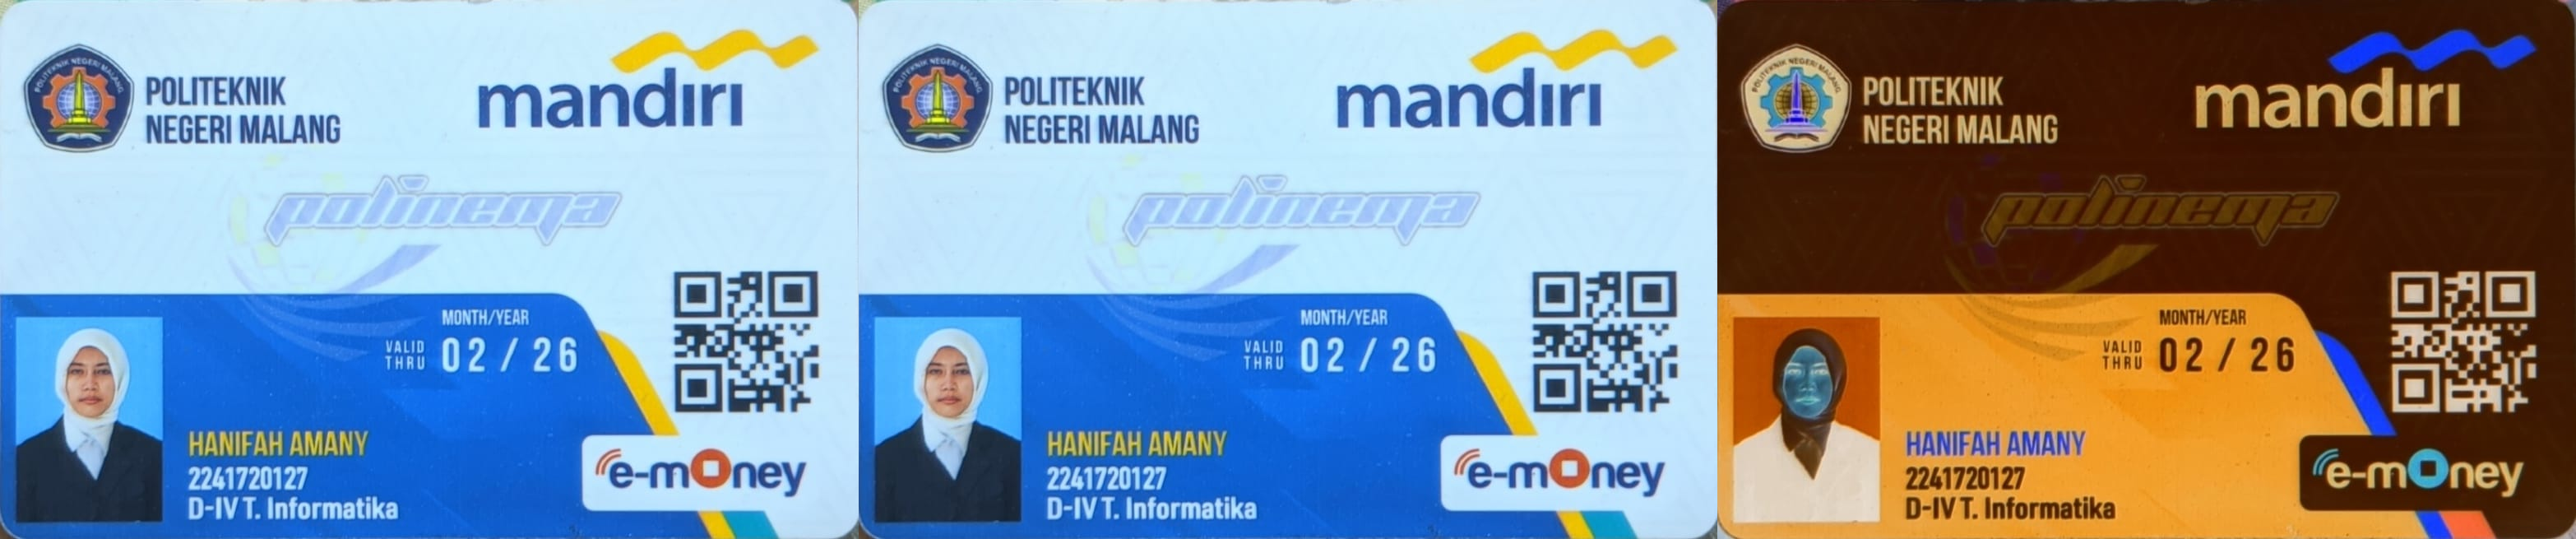

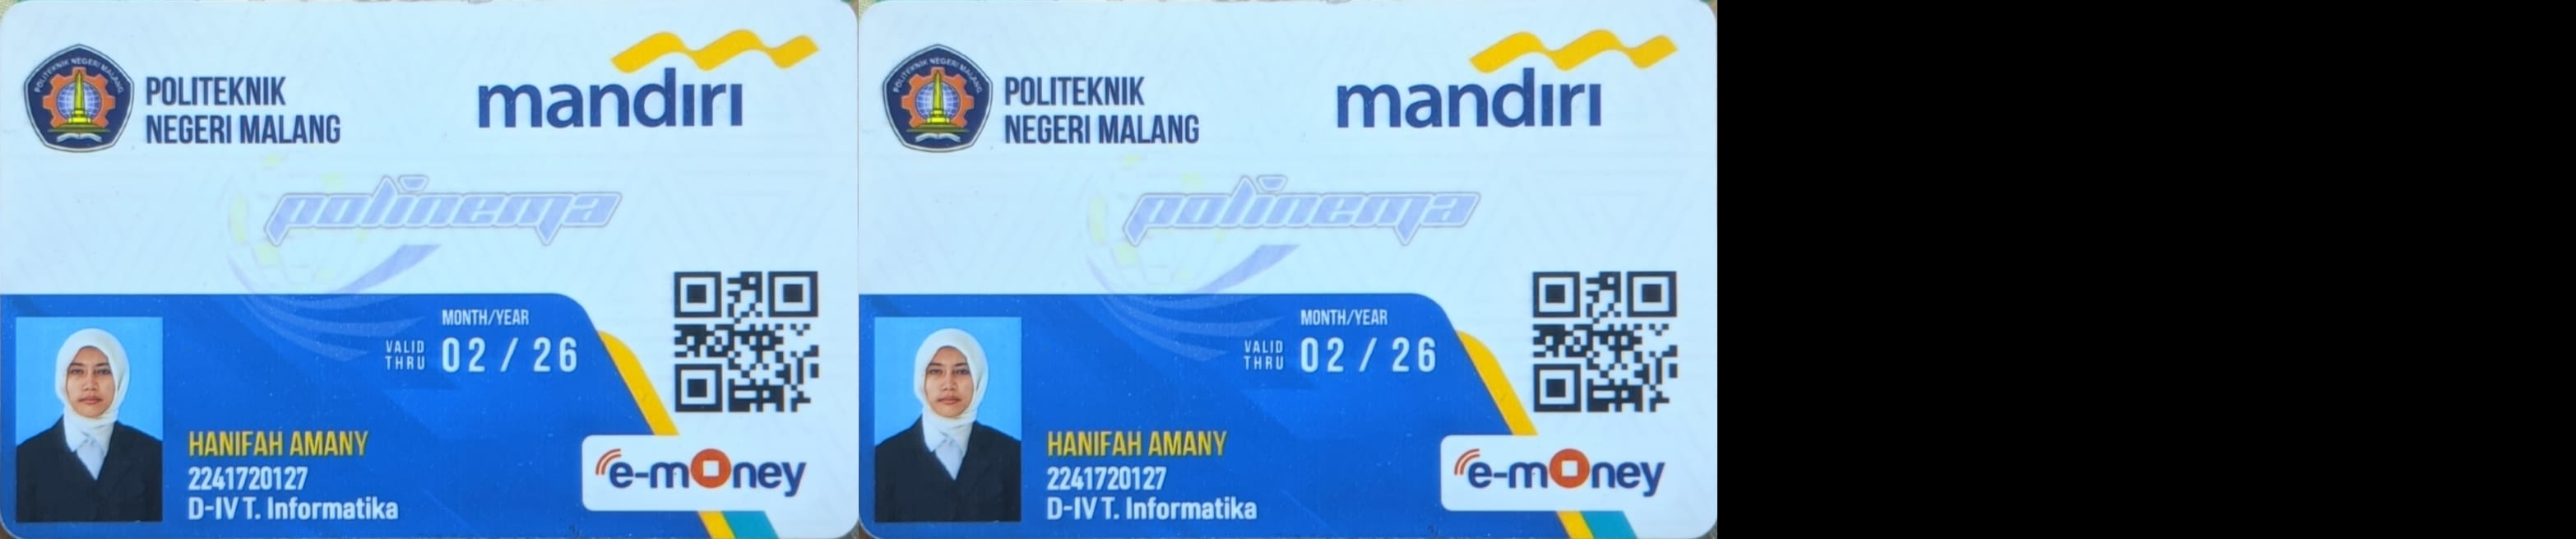

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Load the images
KTM_path = '/content/drive/MyDrive/PCVK 2024/KTM Hanifah.jpg'
mask_path = '/content/drive/MyDrive/PCVK 2024/KTM Hanifah.jpg'
KTM = cv.imread(KTM_path)
mask = cv.imread(mask_path)

# Resize the mask to match the size of KTM
mask_resized = cv.resize(mask, (KTM.shape[1], KTM.shape[0]))

# NOT
inot = ~KTM

# OR
ior = KTM | mask

# AND
iand = KTM & mask

# inand
inand = ~(KTM & mask)

#  XOR
ixor = KTM ^ mask

# Display the results
cv2_imshow(cv.hconcat((KTM, inot)))
cv2_imshow(cv.hconcat((KTM, mask_resized, ior)))
cv2_imshow(cv.hconcat((KTM, mask_resized, iand)))
cv2_imshow(cv.hconcat((KTM, mask_resized, inand)))
cv2_imshow(cv.hconcat((KTM, mask_resized, ixor)))

Opertaor NOT (Komplemen)
*   Operator NOT menghasilkan citra yang merupakan kebalikan dari citra input. Jika piksel pada citra input bernilai 0 (hitam), maka pada citra output akan bernilai 1 (putih), dan sebaliknya.

Operator OR
*   Operator OR menghasilkan citra yang memiliki piksel dengan nilai 1 (putih) jika salah satu atau kedua piksel pada citra input memiliki nilai 1. Artinya, jika setidaknya salah satu piksel input bernilai 1, maka piksel output akan bernilai 1.

Operator AND
*   Operator AND menghasilkan citra yang memiliki piksel dengan nilai 1 (putih) hanya jika kedua piksel pada citra input memiliki nilai 1. Jika salah satu atau kedua piksel input bernilai 0, maka piksel output akan bernilai 0 (hitam).

Operator NAND
*   Operator NAND adalah kebalikan dari operator AND. Citra output akan memiliki piksel dengan nilai 0 (hitam) hanya jika kedua piksel pada citra input memiliki nilai 1. Jika salah satu atau kedua piksel pada citra input memiliki nilai 0 (hitam), maka piksel pada citra output akan memiliki nilai 1 (putih).

Operator XOR
*   Operator XOR (Exclusive OR) menghasilkan citra yang memiliki piksel dengan nilai 1 (putih) hanya jika salah satu piksel pada citra input memiliki nilai 1, tetapi tidak keduanya. Jika kedua piksel pada citra input memiliki nilai yang sama (keduanya 1 (putih) atau keduanya 0 (hitam)), maka piksel pada citra output akan memiliki nilai 0 (hitam).
